<a href="https://colab.research.google.com/github/rbdus0715/Machine-Learning/blob/main/competitions/Predict-CO2-Emissions-in-Rwanda/modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## (0) 초기 세팅

In [10]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
SEED = 2023
random.seed(SEED)
np.random.seed(SEED)

In [12]:
train = pd.read_csv('drive/MyDrive/train.csv')
test = pd.read_csv('drive/MyDrive/test.csv')

train.head(3)

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381


## (1) 피처 엔지니어링 - 이동평균

In [13]:
train['location'] = [str(x) + '_' + str(y) for x, y in zip(train.latitude, train.longitude)]
len(train['location'].unique())

497

In [14]:
example_loc = train[train.location == '-0.51_29.29']
rolling_mean = example_loc['SulphurDioxide_SO2_column_number_density_amf'].rolling(window=2).mean()

<Axes: >

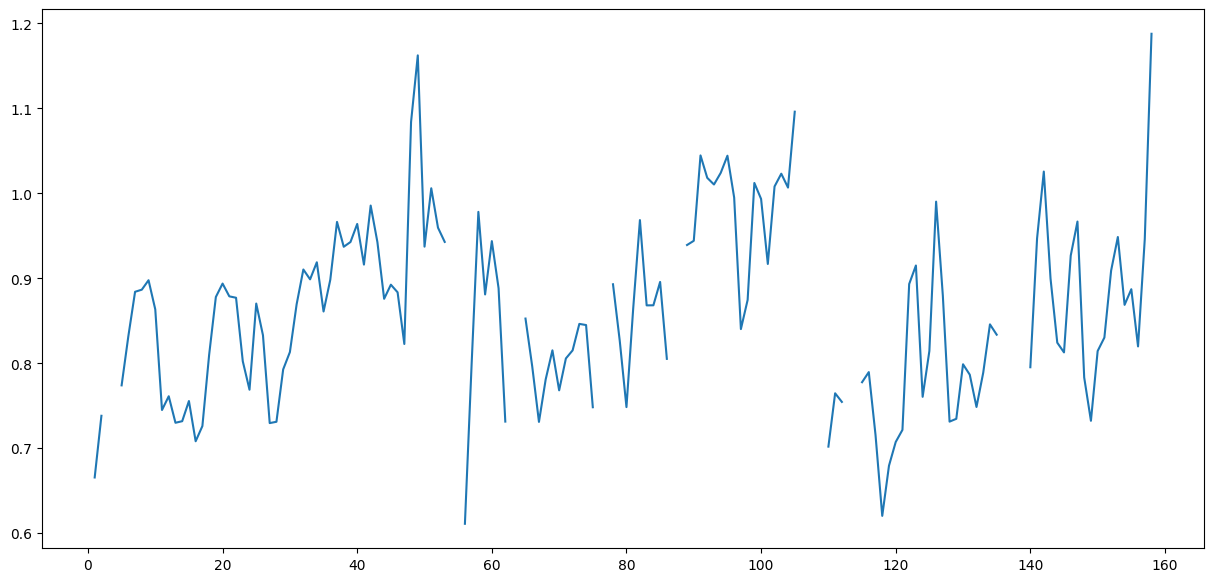

In [15]:
plt.figure(figsize=(15, 7))
rolling_mean.plot()

co2 배출은 사이클 패턴을 갖고있다.

In [16]:
# Feature engineering train
train_roll_mean = train.sort_values(by = ['location', 'year', 'week_no']).groupby(['location'])[train.columns[5:].tolist()].rolling(window = 2).mean().reset_index()
train_roll_mean.drop(['level_1', 'emission', 'location'], axis = 1, inplace = True)
train_roll_mean.columns = [col + '_roll_mean' for col in train_roll_mean.columns]

# Feature engineering test
test.latitude, test.longitude = round(test.latitude, 2), round(test.longitude, 2)
test['location'] = [str(x) + '_' + str(y) for x, y in zip(test.latitude, test.longitude)]
test_roll_mean = test.sort_values(by = ['location', 'year', 'week_no']).groupby(['location'])[test.columns[5:].tolist()].rolling(window = 2).mean().reset_index()
test_roll_mean.drop(['level_1', 'location'], axis = 1, inplace = True)
test_roll_mean.columns =  [col + '_roll_mean' for col in test_roll_mean.columns]
test_roll_mean.head()

,SulphurDioxide_SO2_column_number_density_roll_mean,SulphurDioxide_SO2_column_number_density_amf_roll_mean,SulphurDioxide_SO2_slant_column_number_density_roll_mean,SulphurDioxide_cloud_fraction_roll_mean,SulphurDioxide_sensor_azimuth_angle_roll_mean,SulphurDioxide_sensor_zenith_angle_roll_mean,SulphurDioxide_solar_azimuth_angle_roll_mean,SulphurDioxide_solar_zenith_angle_roll_mean,SulphurDioxide_SO2_column_number_density_15km_roll_mean,CarbonMonoxide_CO_column_number_density_roll_mean,...,Cloud_cloud_top_pressure_roll_mean,Cloud_cloud_top_height_roll_mean,Cloud_cloud_base_pressure_roll_mean,Cloud_cloud_base_height_roll_mean,Cloud_cloud_optical_depth_roll_mean,Cloud_surface_albedo_roll_mean,Cloud_sensor_azimuth_angle_roll_mean,Cloud_sensor_zenith_angle_roll_mean,Cloud_solar_azimuth_angle_roll_mean,Cloud_solar_zenith_angle_roll_mean
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42280.882293,7474.230400,47981.823039,6474.230319,9.692027,0.266946,-65.312056,38.049819,-135.840184,32.395981
2,0.000308,0.648136,0.000211,0.039935,17.091927,27.744833,-138.719412,29.475403,0.000105,0.037718,...,41336.408855,7730.471513,46960.901164,6730.471432,11.100808,0.280124,4.288521,44.169537,-141.708905,28.877870
3,0.000255,0.651012,0.000174,0.140449,15.057112,49.375801,-144.954208,25.930653,0.000073,0.038769,...,42494.035772,7499.759881,48326.231059,6499.759909,11.258868,0.285905,7.311117,44.038449,-139.906440,28.174067
4,0.000017,0.638722,0.000030,0.202690,74.180215,37.254279,-144.397097,23.067462,0.000008,0.039488,...,48724.838110,6432.002268,55271.455120,5432.002255,12.414937,0.294450,-18.686488,36.131530,-135.264005,27.940791


In [17]:
#Train
train_eng = train.sort_values(by = ['location', 'year', 'week_no'], ignore_index = True).merge(train_roll_mean, how = 'left',
                                                                                               left_index=True, right_index=True)
# Test
test_eng = test.sort_values(by = ['location', 'year', 'week_no'], ignore_index = True).merge(test_roll_mean, how = 'left',
                                                                                               left_index=True, right_index=True)
# Preview engineered test set
test_eng.head()

,ID_LAT_LON_YEAR_WEEK,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,...,Cloud_cloud_top_pressure_roll_mean,Cloud_cloud_top_height_roll_mean,Cloud_cloud_base_pressure_roll_mean,Cloud_cloud_base_height_roll_mean,Cloud_cloud_optical_depth_roll_mean,Cloud_surface_albedo_roll_mean,Cloud_sensor_azimuth_angle_roll_mean,Cloud_sensor_zenith_angle_roll_mean,Cloud_solar_azimuth_angle_roll_mean,Cloud_solar_zenith_angle_roll_mean
0,ID_-0.510_29.290_2022_00,-0.51,29.29,2022,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ID_-0.510_29.290_2022_01,-0.51,29.29,2022,1,0.000456,0.691164,0.000316,0.000000,76.239196,...,42280.882293,7474.230400,47981.823039,6474.230319,9.692027,0.266946,-65.312056,38.049819,-135.840184,32.395981
2,ID_-0.510_29.290_2022_02,-0.51,29.29,2022,2,0.000161,0.605107,0.000106,0.079870,-42.055341,...,41336.408855,7730.471513,46960.901164,6730.471432,11.100808,0.280124,4.288521,44.169537,-141.708905,28.877870
3,ID_-0.510_29.290_2022_03,-0.51,29.29,2022,3,0.000350,0.696917,0.000243,0.201028,72.169566,...,42494.035772,7499.759881,48326.231059,6499.759909,11.258868,0.285905,7.311117,44.038449,-139.906440,28.174067
4,ID_-0.510_29.290_2022_04,-0.51,29.29,2022,4,-0.000317,0.580527,-0.000184,0.204352,76.190865,...,48724.838110,6432.002268,55271.455120,5432.002255,12.414937,0.294450,-18.686488,36.131530,-135.264005,27.940791


## (2) 모델링

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# train_eng : train 데이터에서 이동평균 값을 구한 df
X = train_eng.drop(['ID_LAT_LON_YEAR_WEEK', 'location', 'emission'], axis=1).fillna(0)
y = train_eng.emission

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=SEED)

clf = RandomForestRegressor(random_state=SEED, n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

mean_squared_error(y_test, y_pred, squared=False)

27.472498938075532

## (3) 중요도

<Axes: ylabel='feature'>

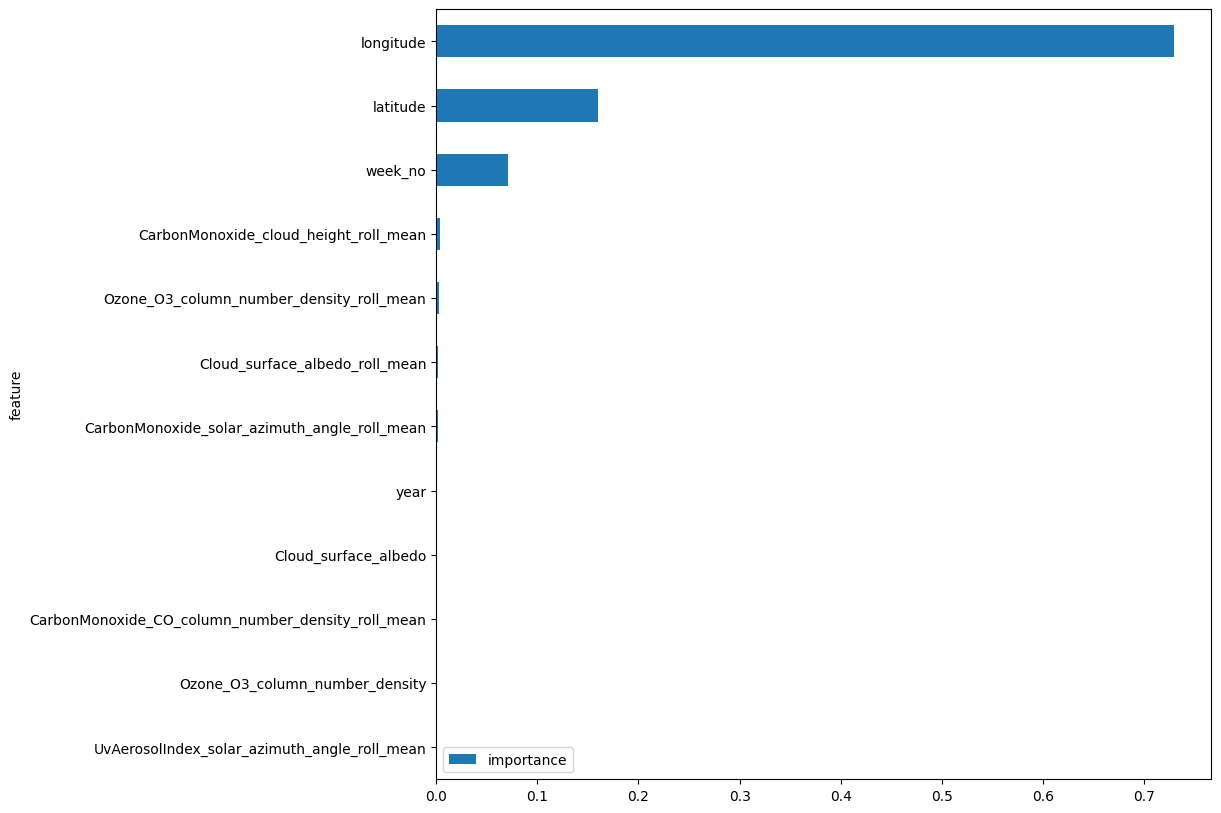

In [19]:
impo_df = pd.DataFrame({'feature':X.columns, 'importance':clf.feature_importances_})\
                .set_index('feature').sort_values(by='importance', ascending=False)

impo_df = impo_df[:12].sort_values(by='importance', ascending=True)
impo_df.plot(kind='barh', figsize=(10, 10))


## (4) test 데이터 답안

In [20]:
test_df = test_eng.drop(['ID_LAT_LON_YEAR_WEEK', 'location'], axis = 1).fillna(0)
predictions = clf.predict(test_df)

sub_file = pd.DataFrame({'ID_LAT_LON_YEAR_WEEK':test_eng.ID_LAT_LON_YEAR_WEEK, 'emission':predictions})
sub_file.head()

,ID_LAT_LON_YEAR_WEEK,emission
0,ID_-0.510_29.290_2022_00,3.679602
1,ID_-0.510_29.290_2022_01,4.251552
2,ID_-0.510_29.290_2022_02,4.296365
3,ID_-0.510_29.290_2022_03,4.354033
4,ID_-0.510_29.290_2022_04,4.094086


In [21]:
sub_file.to_csv('submission.csv', index=False)